# **AstrID:**  *data gathering*

In [1]:
# Import custom functions to extract Image arrays and Pixel Mask arrays from our created fits files dataset
from scripts.dataGathering import createStarDataset, getImagePlot, getPixelMaskPlot
from scripts.dataGathering import displayRawImage, displayRawPixelMask, displayImagePlot, displayPixelMaskPlot, displayPixelMaskOverlayPlot
from scripts.dataGathering import importDataset, getFitsHeader, getFitsContents, getStarTable

from IPython.display import display

### Major Functionality of the `dataGathering` Module

The [`dataGathering`](dataGathering.py) module contains several important functions that facilitate the preparation and visualization of our dataset. Below, we provide an overview of the major functionalities:

1. **Data Extraction Functions**:
   - `extractImageArray`: Extracts image data from FITS files.
   - `extractPixelMaskArray`: Extracts pixel mask data from FITS files.
   - `extractStarCatalog`: Extracts star catalog data from FITS files.

2. **Visualization Functions**:
   - `getImagePlot`: Generates a plot of the image data.
   - `getPixelMaskPlot`: Generates a plot of the pixel mask data.
   - `displayRawImage`: Displays the raw image data.
   - `displayRawPixelMask`: Displays the raw pixel mask data.
   - `displayImagePlot`: Displays the image plot.
   - `displayPixelMaskPlot`: Displays the pixel mask plot.
   - `displayPixelMaskOverlayPlot`: Displays an overlay plot of the image and pixel mask.

3. **Star Data Functions**:
   - `createStarDataset`: Generates and saves FITS files containing image data and star catalog data.
   - `getFitsContents`: 
   - `getStarTable`: 
   - `getFitsHeader`:
   - `getStarTable`:
   - `importDataset`: Imports the dataset by reading FITS files from a specified directory and extracting images, masks, and star data.

These functions work together to streamline the process of preparing and visualizing our dataset, ensuring that we have high-quality data for training and validating our model.

## **Creating the Dataset:** Retrieving Data for Training the Model

The `createStarDataset` function is a crucial part of our data preparation pipeline. It is responsible for generating and saving FITS files that contain both image data and star catalog data. These FITS files are then used to train our model. Below, we explain the functionality of the `createStarDataset` function and how it is used to prepare the dataset for training and validation.

### Functionality of `createStarDataset`



The `createStarDataset` function performs the following steps:

1. **Directory Creation**:
   - Creates a new directory named `data` if it does not already exist. This directory will store the generated FITS files.

2. **Coordinate Generation**:
   - Generates random coordinates (RA and Dec) while avoiding the galactic plane to ensure a diverse set of sky regions.

3. **Image Data Fetching**:
   - Uses the `SkyView` service to fetch image data from the DSS survey for the generated coordinates. The image data is saved as a FITS file.

4. **Star Catalog Fetching**:
   - Uses the `Vizier` service to fetch star catalog data for the same coordinates. The star catalog data is appended to the FITS file as a binary table HDU.

5. **Pixel Mask Creation**:
   - Creates a pixel mask indicating the positions of stars in the image. The pixel mask is saved as an additional HDU in the FITS file.

6. **Star Overlay Plot**:
   - Generates a plot of the image with star positions overlaid. This plot is saved as an image file and then converted to FITS format, appended to the original FITS file.


#### Using `createStarDataset` to Prepare the Dataset

To prepare the dataset for training the model, we use the `createStarDataset` function with the parameter `'data'`. This generates a set of FITS files containing image data, star catalog data, and pixel masks. These files are stored in the [fits](data/fits/) directory.

```python
# Generate training data
createStarDataset(catalog_type='II/246', iterations=20, file_path='data/fits/data/', filename='data', pixels=1024)
```

In [2]:
# createStarDataset('II/246', 20, 'data/fits/data/', 'data', 1024)

For validation purposes, we use the `createStarDataset` function with the filename parameter `'validate'`. This generates a separate set of FITS files for validation, ensuring that the files have the name `validate0.fits` for the [validateModel.ipynb](validateModel.ipynb) notebook.

```python
# Generate validation data
createStarDataset(catalog_type='II/246', iterations=50, file_path='data/fits/validate/', filename='validate', pixels=1024)
```

In [3]:
# createStarDataset('II/246', 20, 'data/fits/validate/', 'validate', 1024)

### Importing Images and Star Data from the Dataset

In this section, we will import the images, masks, and star data from our prepared dataset using the `importDataset` function. This function reads the FITS files from the specified directory and extracts the necessary data for training our model. We will also display the key functions from the [`dataGathering`](dataGathering.py) module that are used in this process.

In [6]:
# Create images and masks arrays lists
images = []
masks = []

# Create df to store the star data inside each fits file
stars_in_image = []

# Create a list to store the wcs data for each fits file
wcs_data = []

# Createa a list of all the fits files in the dataset
fits_files = []

images, masks, stars_in_image, wcs_data, fits_files = importDataset(dataset_path='data/fits/data/')

Number of stars in catalog query:  3324
data8.fits added to dataset
Number of stars in catalog query:  2693
data5.fits added to dataset
Number of stars in catalog query:  1338
data19.fits added to dataset
Number of stars in catalog query:  2660
data7.fits added to dataset
Number of stars in catalog query:  1537
data6.fits added to dataset
Number of stars in catalog query:  710
data11.fits added to dataset
Number of stars in catalog query:  811
data9.fits added to dataset
Number of stars in catalog query:  2039
data4.fits added to dataset
Number of stars in catalog query:  4053
data16.fits added to dataset
Number of stars in catalog query:  497
data13.fits added to dataset
Number of stars in catalog query:  1037
data2.fits added to dataset
Number of stars in catalog query:  859
data0.fits added to dataset
Number of stars in catalog query:  996
data1.fits added to dataset
Number of stars in catalog query:  2607
data3.fits added to dataset
Number of stars in catalog query:  7641
data10.fi

We will test the functionality of the following functions using the first file in the fits_files list.

In [9]:
fits_file = fits_files[0]
file_path = 'data/fits/data/' + fits_file

## FITS File Structure

What is a FITS file anyways?

The FITS (Flexible Image Transport System) file format is commonly used in astronomy to store image data, along with associated metadata and additional data tables. In the context of the AstrID project, each FITS file contains several components that are essential for training and validating the machine learning models.

#### Components of a FITS File

1. **Primary HDU (Header Data Unit)**:
   - Contains the main image data and associated metadata (header).
   - The image data is stored as a 2D array of pixel values.

2. **Star Catalog HDU**:
   - A binary table HDU that contains the star catalog data.
   - Includes information about the stars in the image, such as their coordinates and magnitudes.

3. **Pixel Mask HDU**:
   - An image HDU that contains a binary mask indicating the positions of stars in the image.
   - The mask is a 2D array with the same dimensions as the primary image, where pixels corresponding to star positions are set to 1.

4. **Star Overlay HDU**:
   - An image HDU that contains a visualization of the image with star positions overlaid.
   - This is useful for visually verifying the positions of stars in the image.

In [18]:
getFitsContents(file_path)

Filename: data/fits/data/data8.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float32   
  1  STAR_CATALOG    1 BinTableHDU     62   3324R x 15C   [D, D, 17A, E, E, E, E, E, E, 3A, I, I, 3A, B, B]   
  2  STAR_OVERLAY    1 ImageHDU         8   (1024, 1024)   uint8   
  3  PIXEL_MASK    1 ImageHDU         8   (1024, 1024)   float64   


### Star Data

The star data in the FITS file contains extensive information on each star in the image. We use the coordinates from the star table to create our pixel mask, which serves as ground truth in model training.

#### Star Features Included

- **RAJ2000**: Right Ascension in J2000 coordinates, used to pinpoint the star's position in the sky.
- **DEJ2000**: Declination in J2000 coordinates, used alongside RAJ2000 to locate the star.
- **_2MASS**: Identifier from the 2MASS survey, providing a unique reference for each star.
- **Jmag**: Magnitude in the J band, indicating the star's brightness in near-infrared light.
- **e_Jmag**: Error in J band magnitude, representing the uncertainty in the Jmag measurement.
- **Hmag**: Magnitude in the H band, another measure of the star's brightness in near-infrared light.
- **e_Hmag**: Error in H band magnitude, representing the uncertainty in the Hmag measurement.
- **Kmag**: Magnitude in the K band, indicating the star's brightness in the far-infrared spectrum.
- **e_Kmag**: Error in K band magnitude, representing the uncertainty in the Kmag measurement.
- **Qflg**: Quality flag, providing information on the reliability of the photometric measurements.
- **Rflg**: Read flag, indicating the number of times the star was observed.
- **Bflg**: Blend flag, showing whether the star's image was blended with another source.
- **Cflg**: Contamination flag, indicating potential contamination from nearby sources.
- **Xflg**: Extended source flag, identifying whether the star is part of an extended object.
- **Aflg**: Artifact flag, indicating the presence of artifacts in the star's image.

This section provides a concise overview of the various star features included in the FITS files, highlighting the diverse range of astronomical data used in the AstrID project. Each feature plays a crucial role in accurately identifying and classifying stars, contributing to the overall effectiveness of the machine learning models.

In [19]:
star_data = getStarTable(file_path)
display(star_data)

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,int16,int16,str3,uint8,uint8
110.183796,12.798334,07204411+1247540,14.914,0.04,14.304,0.054,14.121,0.047,AAA,222,111,000,0,0
110.186805,12.801756,07204483+1248063,15.552,0.064,15.116,0.091,15.001,0.106,AAA,222,111,000,0,0
110.184001,12.791817,07204416+1247305,15.238,0.051,14.93,0.086,14.874,0.1,AAA,222,111,000,0,0
110.188924,12.794734,07204534+1247410,16.534,0.137,15.91,0.188,15.65,0.181,BCC,222,111,000,0,0
110.171815,12.800998,07204123+1248035,15.864,0.084,15.178,0.105,15.216,0.155,AAB,222,111,000,0,0
110.16205,12.807412,07203889+1248266,10.973,0.023,10.361,0.03,10.241,0.019,AAA,222,111,000,0,0
110.171801,12.803759,07204123+1248135,14.926,0.036,14.631,0.06,14.498,0.072,AAA,222,111,000,0,0
110.159147,12.811064,07203819+1248398,16.46,0.127,15.588,0.151,15.152,0.133,BBB,222,111,cc0,0,0
110.17539,12.807584,07204209+1248273,16.39,0.119,16.357,0.252,16.133,nan,BDU,220,110,000,0,0


In [20]:
# Show max and min Jmag values
display(star_data['Jmag'].max())
display(star_data['Jmag'].min())

18.768

6.304

In [21]:
fits_header = getFitsHeader(file_path)
display(fits_header)

{'SIMPLE': True,
 'BITPIX': -32,
 'NAXIS': 2,
 'NAXIS1': 1024,
 'NAXIS2': 1024,
 'EXTEND': True,
 'CRVAL1': 110.171,
 'CRVAL2': 13.1393,
 'RADESYS': 'FK5',
 'EQUINOX': 2000.0,
 'CTYPE1': 'RA---TAN',
 'CTYPE2': 'DEC--TAN',
 'CRPIX1': 512.5,
 'CRPIX2': 512.5,
 'CDELT1': -0.00048828125,
 'CDELT2': 0.00048828125,
 'COMMENT': 
 SkyView Survey metadata
 
 Provenance:  Data taken by ROE and AAO, CalTech, Compression
                    and distribution by Space Telescope Science Instit
          ute.
 Copyright:   STScI, ROE, AAO, UK-PPARC, CalTech, National Geographic S
          ociety.            Full copyright notice
 Regime:      Optical
 NSurvey:     1
 Frequency:   560 THz (Different plates have different bands: J or E wi
          th a few exceptions)
 Bandpass:    422-965 THz (individual plates have smaller bandpass)
 Coverage:    All-sky
 PixelScale:  1.7"
 Units:       Scaled densities
 Resolution:  Depends on plate.  Typically 2"
 Coordinates: Equatorial
 Projection:  Schmidt (dis

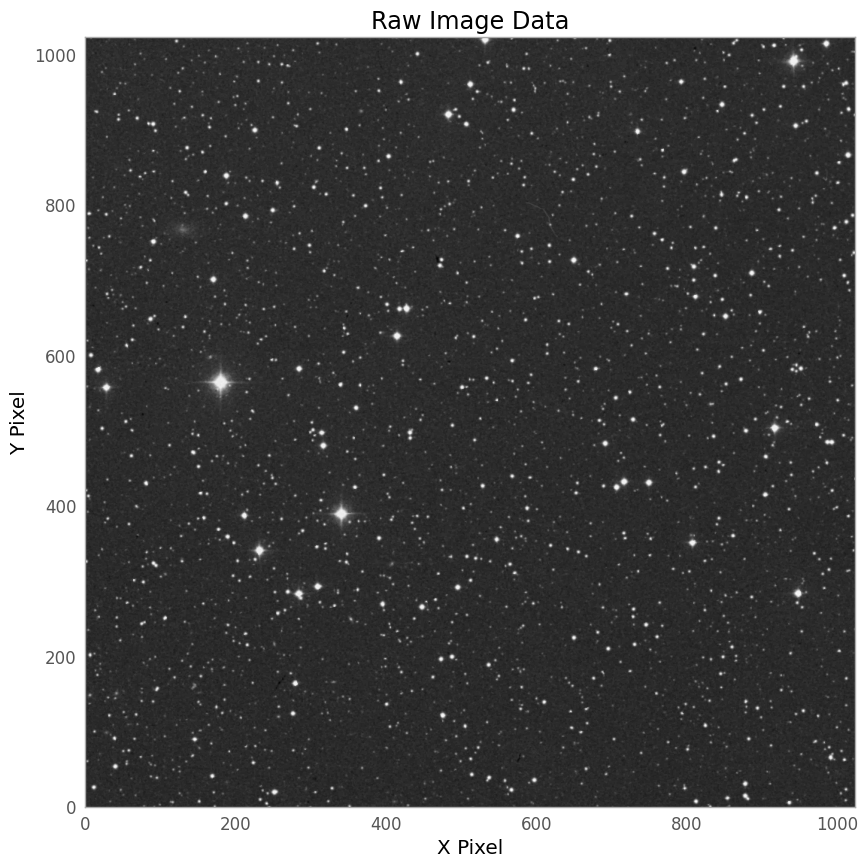

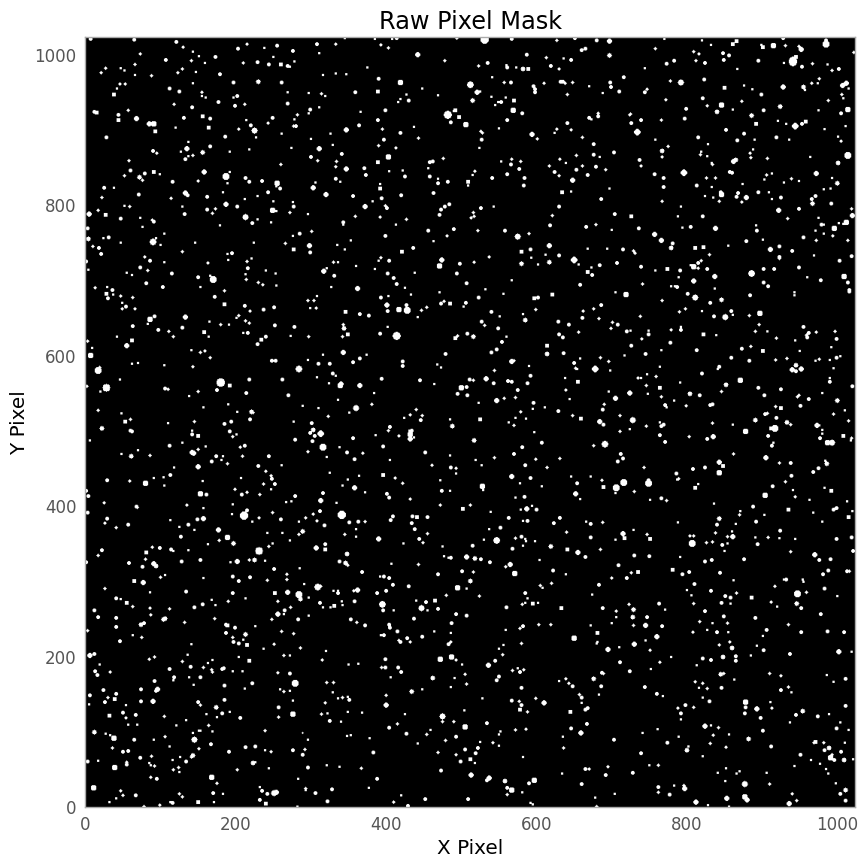

In [22]:
# Display the first image and mask
displayRawImage(file_path)
displayRawPixelMask(file_path)


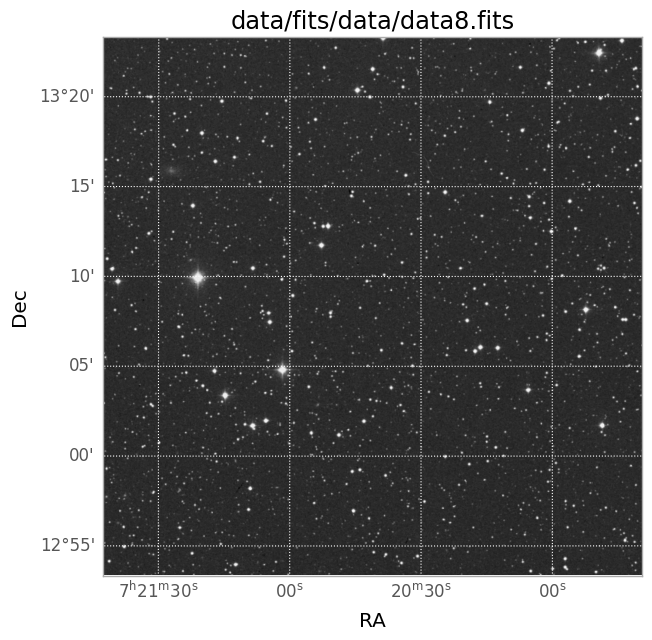

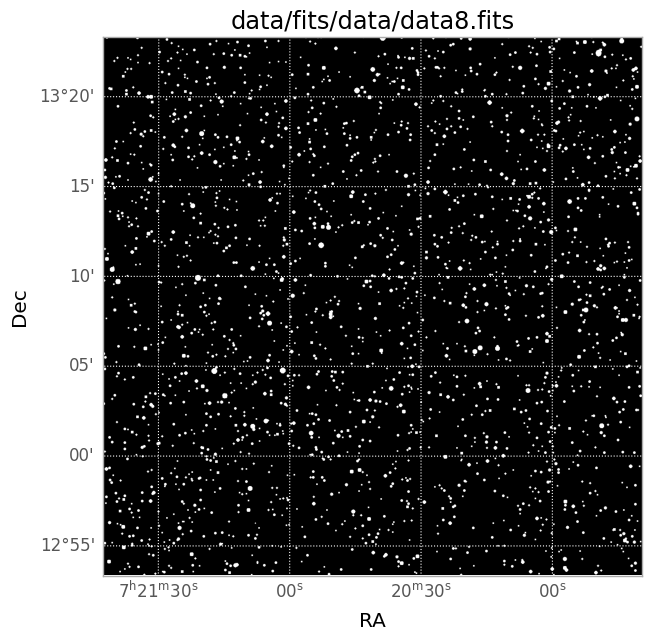

Number of stars in catalog query:  3324
Number of cataloged stars in image:  2167
Drawing


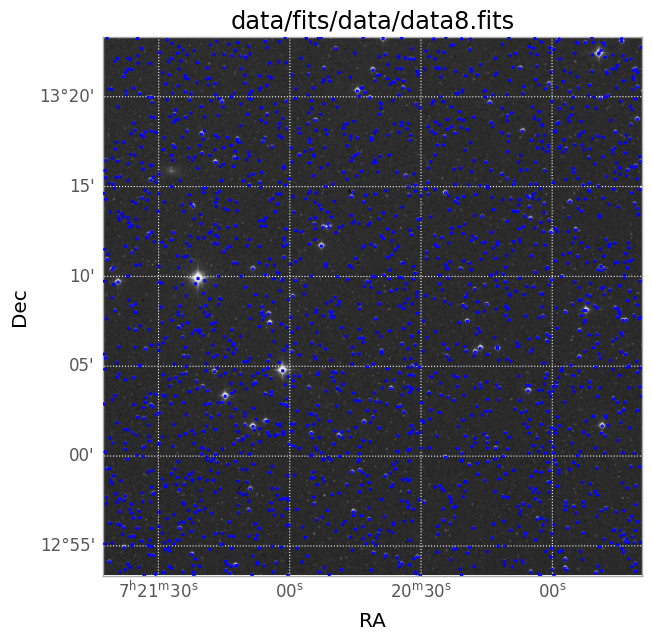

In [23]:
# Display the first image and mask with the star overlay
displayImagePlot(file_path)
displayPixelMaskPlot(file_path)
displayPixelMaskOverlayPlot(file_path)
